In [8]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.adx_atr_strategy import (
    AdxAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.boll_atr_strategy import (
    BollAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.cci_atr_strategy import (
    CciAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.donchian_atr_strategy import (
    DonchianAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.macd_atr_strategy import (
    MacdAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.macd_atr_strategy import (
    MacdAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.keltner_atr_strategy import (
    KeltnerAtrStrategy,
)
from vnpy.app.cta_strategy.strategies.rsi_atr_strategy import (
    RsiAtrStrategy,
)

from vnpy.app.cta_strategy.strategies.boll_channel_strategy import (
    BollChannelStrategy,
)
from vnpy.app.cta_strategy.strategies.double_ma_strategy import (
    DoubleMaStrategy,
)
from vnpy.app.cta_strategy.strategies.dual_thrust_strategy import (
    DualThrustStrategy,
)
from vnpy.app.cta_strategy.strategies.king_keltner_strategy import (
    KingKeltnerStrategy,
)
from vnpy.app.cta_strategy.strategies.multi_timeframe_strategy import (
    MultiTimeframeStrategy,
)
from vnpy.app.cta_strategy.strategies.turtle_signal_strategy import (
    TurtleSignalStrategy,
)
from datetime import datetime

In [9]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="ETHUSD.BITMEX",
    interval="1m",
    start=datetime(2019, 7, 21),
    end=datetime(2019, 9, 10),
    rate=0.001 * 0.0,
    slippage=0.05,
    size=1,
    pricetick=0.05,
    capital=1_000_000,
)
engine.add_strategy(TurtleSignalStrategy, dict(reverse=True))

2019-09-10 16:49:26.620801	开始加载历史数据
2019-09-10 16:49:26.621803	加载进度：[59%]
2019-09-10 16:49:26.622802	加载进度：[100%]
2019-09-10 16:49:26.622802	历史数据加载完成，数据量：73442
2019-09-10 16:49:27.525800	策略初始化完成
2019-09-10 16:49:27.526803	开始回放历史数据
2019-09-10 16:49:31.463802	历史数据回放结束
2019-09-10 16:49:31.463802	开始计算逐日盯市盈亏
2019-09-10 16:49:31.487801	逐日盯市盈亏计算完成
2019-09-10 16:49:31.488801	开始计算策略统计指标
2019-09-10 16:49:31.495800	------------------------------
2019-09-10 16:49:31.496801	首个交易日：	2019-08-10
2019-09-10 16:49:31.496801	最后交易日：	2019-09-10
2019-09-10 16:49:31.496801	总交易日：	32
2019-09-10 16:49:31.496801	盈利交易日：	22
2019-09-10 16:49:31.496801	亏损交易日：	9
2019-09-10 16:49:31.496801	起始资金：	1,000,000.00
2019-09-10 16:49:31.496801	结束资金：	1,000,404.15
2019-09-10 16:49:31.497799	总收益率：	0.04%
2019-09-10 16:49:31.497799	年化收益：	0.30%
2019-09-10 16:49:31.497799	最大回撤: 	-25.25
2019-09-10 16:49:31.497799	百分比最大回撤: -0.00%
2019-09-10 16:49:31.497799	总盈亏：	404.15
2019-09-10 16:49:31.497799	总手续费：	0.00
2019-09-10 16:49:31.497799	总滑点：	

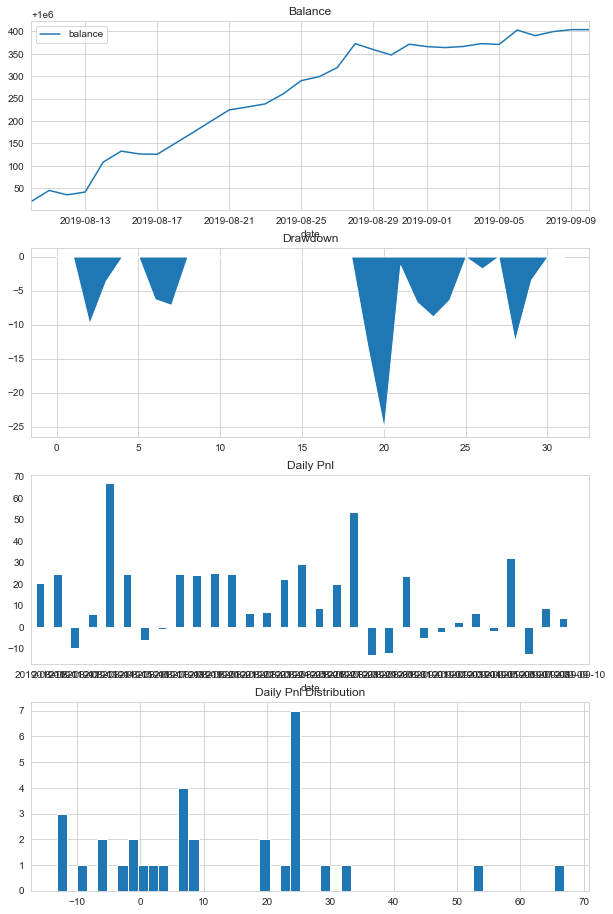

In [10]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [ ]:
setting = OptimizationSetting()
# setting.set_target("sharpe_ratio")
setting.set_target("end_balance")
setting.add_parameter("atr_length", 3, 39, 1)
setting.add_parameter("atr_ma_length", 10, 30, 1)
setting.add_parameter("rsi_length", 3, 20, 1)

engine.run_ga_optimization(setting, 10, 10)

In [4]:
for t in engine.get_all_trades():
    print(t.datetime, t.offset, t.direction)

2019-08-14 16:26:00 Offset.OPEN Direction.LONG
2019-08-14 16:30:00 Offset.CLOSE Direction.SHORT
2019-08-14 17:04:00 Offset.OPEN Direction.LONG
2019-08-14 17:05:00 Offset.CLOSE Direction.SHORT
2019-08-14 17:14:00 Offset.OPEN Direction.LONG
2019-08-14 17:15:00 Offset.CLOSE Direction.SHORT
2019-08-26 00:19:00 Offset.OPEN Direction.SHORT
2019-08-26 00:20:00 Offset.CLOSE Direction.LONG
2019-08-28 18:03:00 Offset.OPEN Direction.LONG
2019-08-28 18:05:00 Offset.CLOSE Direction.SHORT
2019-08-28 18:17:00 Offset.OPEN Direction.LONG
2019-08-28 18:20:00 Offset.CLOSE Direction.SHORT
2019-09-07 16:34:00 Offset.OPEN Direction.SHORT
2019-09-07 16:35:00 Offset.CLOSE Direction.LONG
